# Analsisa Penumpang (Ride-sharing)

Anda bekerja sebagai seorang analis untuk Zuber, sebuah perusahaan berbagi tumpangan (*ride-sharing*) baru yang diluncurkan di Chicago. Tugas Anda adalah untuk menemukan pola pada informasi yang tersedia. Anda ingin memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan.

Dengan menggunakan basis data, Anda akan menganalisis data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan.

<b>Objektif:</b>

   1. Preferensi penumpang dan dampak faktor eksternal berpengaruh terhadap perjalanan
   
<b>Hipotesis:</b>
   1. Durasi rata-rata perjalanan dari Loop ke Bandara International O'Hare berubah pada hari-hari Sabtu yang hujan

<b>Tahapan:</b><a id='back'></a>

1. [Ikhtisar Data](#Mulai)
    - [Dataset pertama](#pertama)
    - [Dataset kedua](#kedua)
    - [Dataset ketiga](#ketiga)
2. [Pra-pemprosesan Data](#Pra-pemrosesan)
3. [*Exploratory Data Analysis*](#EDA)
    - [Ranking perusahaan berdasarkan jumlah pengantaran](#1)
    - [Ranking lokasi tujuan berdasarkan rata-rata perjalanan](#2)
4. [Menguji Hipotesis](#Test)
    - [Durasi rata-rata perjalanan dari Loop ke Bandara International O'Hare](#h1)
5. [Kesimpulan Umum](#Kesimpulan)

## Ikhtisar Data <a id="Mulai"></a>

In [1]:
# Memuat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

### Dataset pertama <a id="pertama"></a>

In [2]:
# Memmuat dataset
company_df = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\6 Project\\project_sql_result_01.csv')

In [3]:
# Memeriksa informasi dataset
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Ukuran dataset
company_df.shape

(64, 2)

In [5]:
# Sampel data
company_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Dokumentasi:
- `company_name` - nama perusahaan taksi
- `trips_amount` - jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.

In [6]:
# Memeriksa duplikat
company_df.duplicated().sum()

0

Setelah memuat, dan memeriksa dataset diatas, semua tampak bagus dan tidak memerlukan adanya perbaikan.

[Kembali ke tahapan](#back)

### Dataset kedua <a id="kedua"></a>

In [7]:
# Memuat dataset
location_df = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\6 Project\\project_sql_result_04.csv')

In [8]:
# Memeriksa info dataset
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
# Ukuran dataset
location_df.shape

(94, 2)

In [10]:
# Sampel data
location_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Dokumentasi:
- `dropoff_location_name` - nama wilayah di Chicago tempat perjalanan berakhir
- `average_trips` - jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.

In [11]:
# Memeriksa duplikat
location_df.duplicated().sum()

0

Dataset kedua juga tampak tidak ada yang perlu diperbaiki.

[Kembali ke tahapan](#back)

### Dataset ketiga <a id="ketiga"></a>

In [12]:
# Memuat dataset
weather_df = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\6 Project\\project_sql_result_07.csv')

In [13]:
# Memeriksa info dataset
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
# Ukuran dataset
weather_df.shape

(1068, 3)

In [15]:
# Sampel data
weather_df.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


*File* ini memuat data perjalanan dari Loop ke Bandara Internasional O'Hare.

Dokumentasi:
- `start_ts` - tanggal dan waktu penjemputan
- `weather_conditions` - kondisi cuaca saat perjalanan dimulai
- `duration_seconds` - durasi perjalanan dalam satuan detik

In [16]:
# Memeriksa duplikat
weather_df.duplicated().sum()

197

**Kesimpulan sementara**
1. Merubah tipe data kolom `start_ts`- dataset ketiga,
2. Terdapat duplikasi yang harus diperbaiki - dataset ketiga.

[Kembali ke tahapan](#back)

## Pra-pemprosesan Data <a id="Pra-pemrosesan"></a>

In [17]:
# Memperbaiki duplikat
weather_df = weather_df.drop_duplicates().reset_index(drop=True)

In [18]:
# Memeriksa hasilnya
weather_df.duplicated().sum()

0

In [19]:
# Merubah tipe data kolom `start_ts`
weather_df['start_ts'] = pd.to_datetime(weather_df['start_ts'])

In [20]:
# Memeriksa hasilnya
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 20.5+ KB


Seperti yang terlihat dataset sudah diperbaiki.

[Kembali ke tahapan](#back)

## *Exploratory Data Analysis* <a id="EDA"></a>

### Ranking perusahaan berdasarkan jumlah pengantaran <a id="1"></a>

In [21]:
# Filter data
top_ten_company = company_df.sort_values(by='trips_amount', ascending = False).head(10)

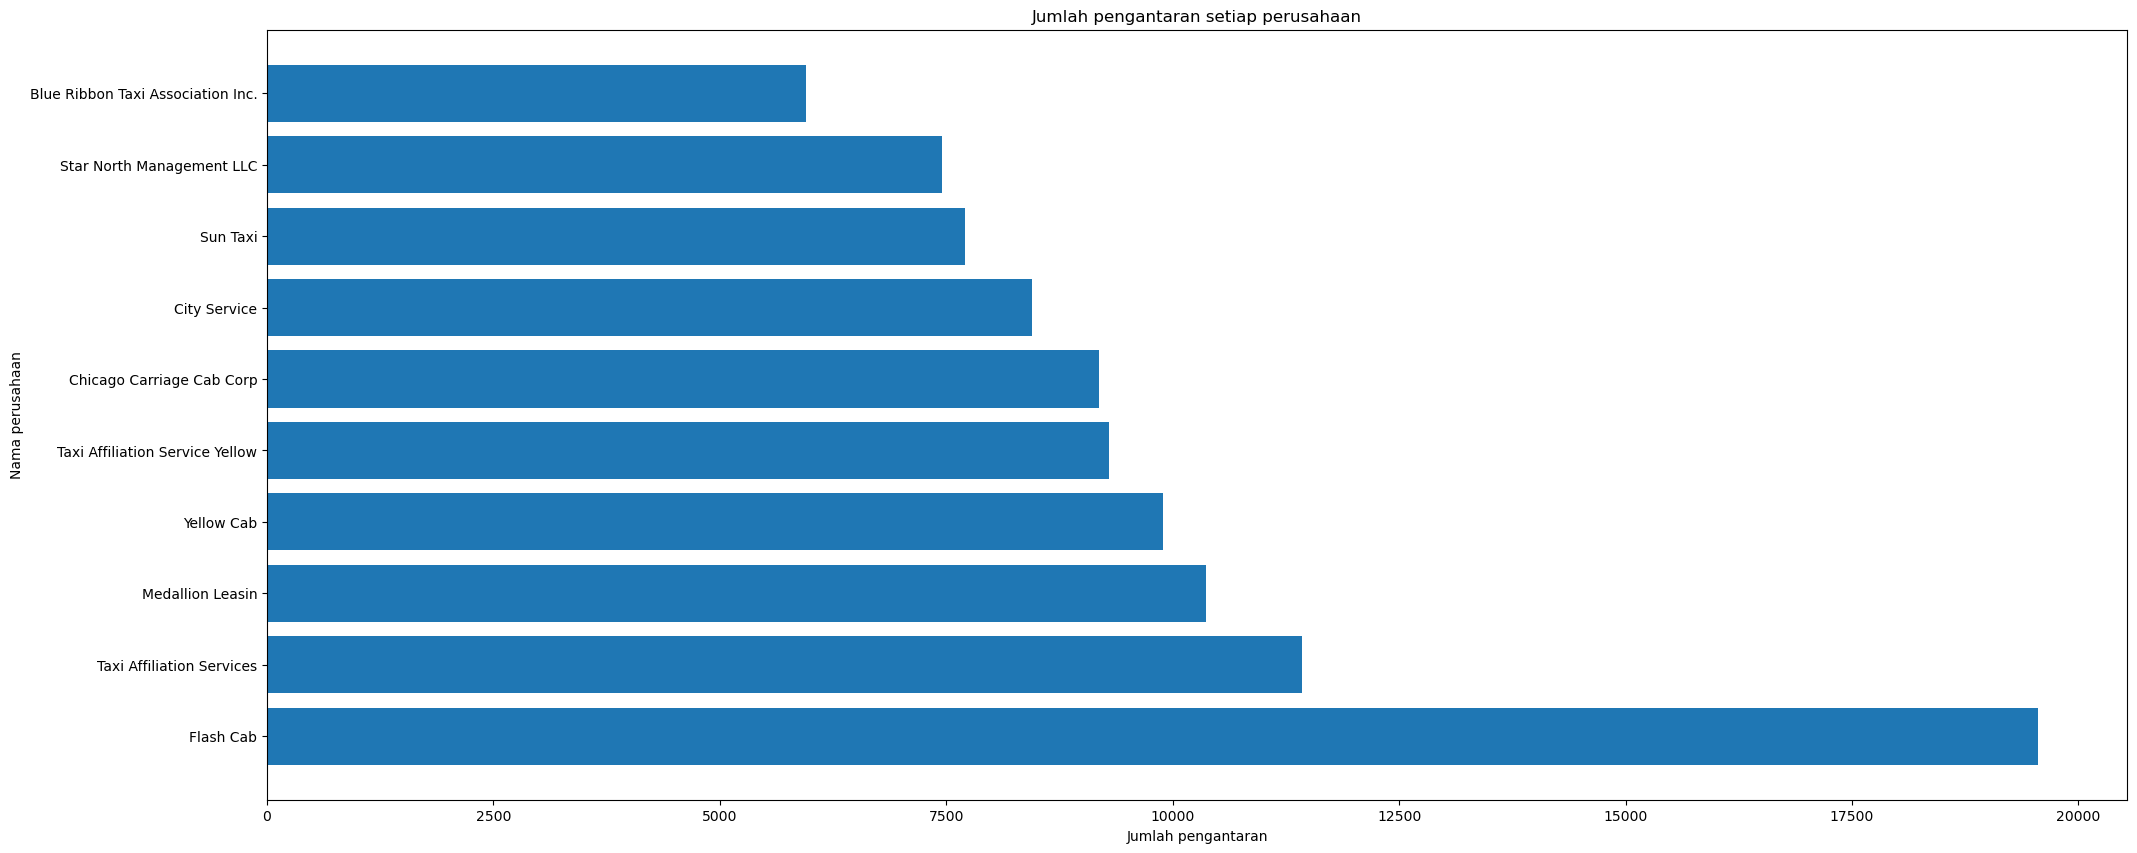

In [22]:
# Horizontal bars
plt.figure(figsize=(24, 10))
plt.barh(y=top_ten_company.company_name, width=top_ten_company.trips_amount)

# Judul
plt.title("Jumlah pengantaran setiap perusahaan")
 
# Penamaan x,y-axis
plt.xlabel('Jumlah pengantaran')
plt.ylabel('Nama perusahaan')
 
# Menampilkan hasilnya
plt.show()

Flash Cab menjadi perusahaan dengan titik pengantaran terbanyak, Taxi Affiliation Services, dan Medallion Leasing ditempat berikutnya namun tidak bisa dibandingkan dengan Flash Cab, mungkin ada beberapa alasan yang menjadikan Flash Cab diperingkat tertinggi.

[Kembali ke tahapan](#back)

### Rangking lokasi tujuan berdasarkan rata-rata perjalanan <a id="2"></a>

In [23]:
# Filter data
top_ten_location = location_df.sort_values(by='average_trips', ascending = False).head(10)

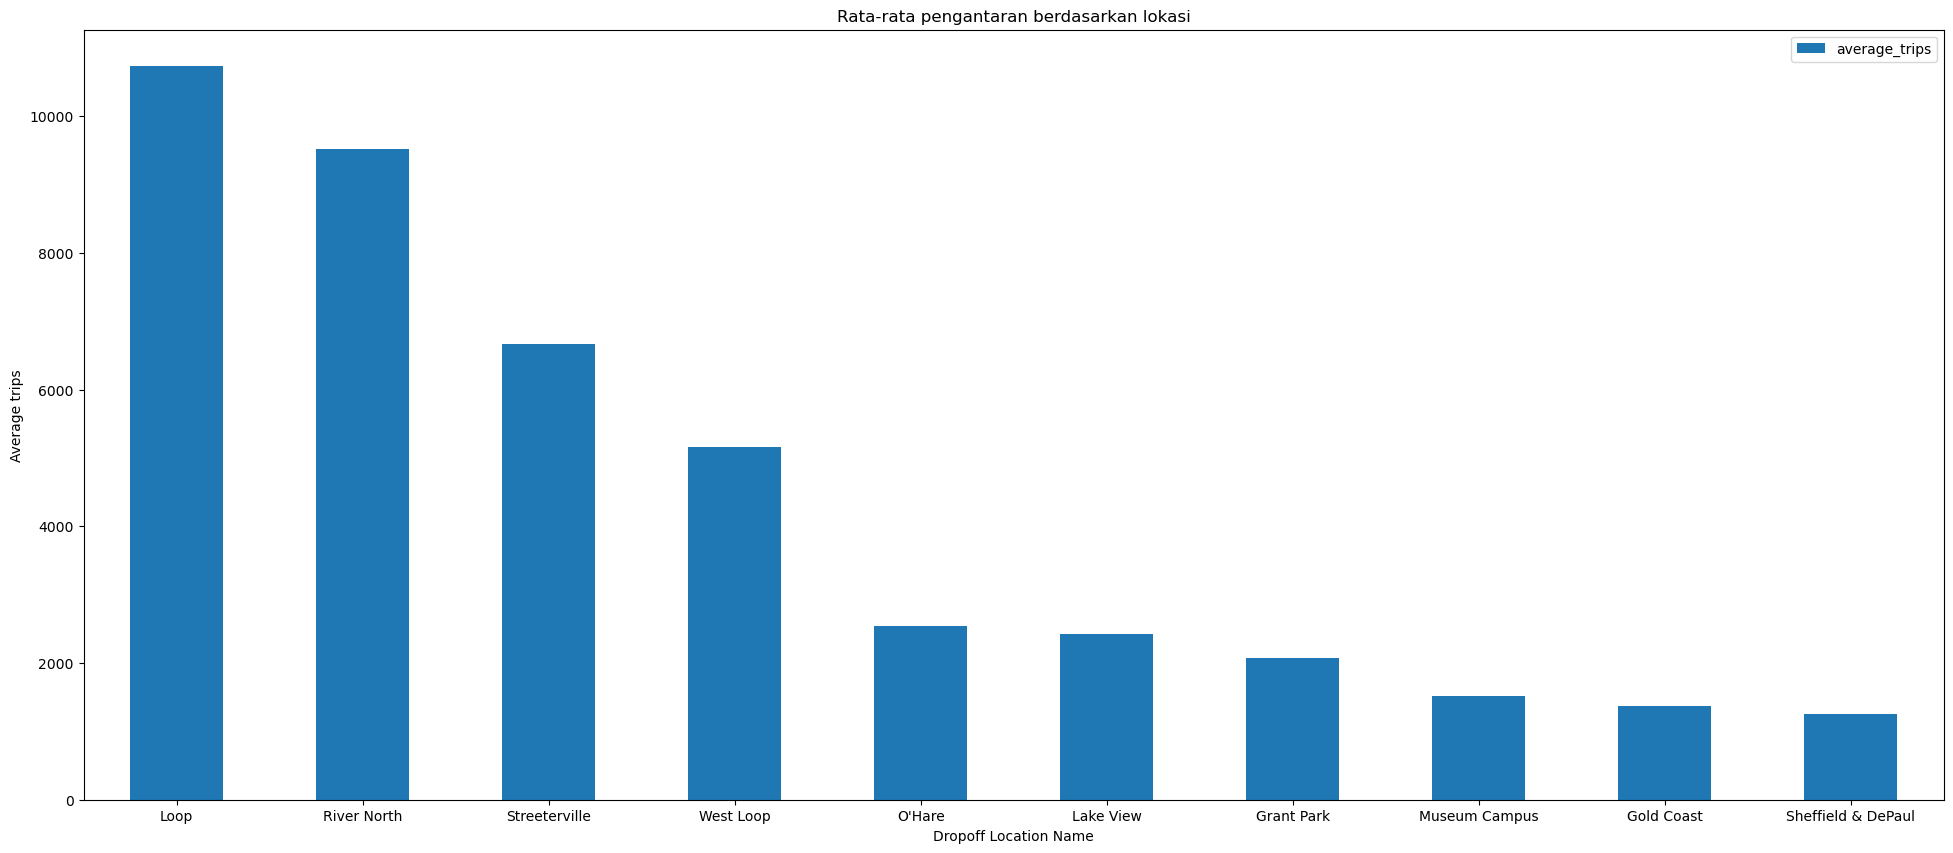

In [24]:
# Memvisualisasikan data yang telah difilter
top_ten_location.plot(x='dropoff_location_name', y='average_trips', kind='bar', rot=0, figsize=(24, 10))

# Judul
plt.title("Rata-rata pengantaran berdasarkan lokasi")

# Penamaan x,y-axis
plt.xlabel('Dropoff Location Name')
plt.ylabel('Average trips')

# Menampilkan hasilnya
plt.show()

Loop menjadi lokasi yang paling banyak dituju, diikuti oleh River North di nomor dua Streeterville berikutnya. Namun kali ini perbedaan tidak terlalu signifikan diantara satu tempat ke tempat yang lainnya.

[Kembali ke tahapan](#back)

## Menguji Hipotesis <a id="Test"></a>

Uji hipotesis kali ini akan menggunakan t-test dimana sampel untuk menguji perbedaan antara dua variabel.

ada beberapa jenis T-test, seperti *one sample t-test, independent sample t-test, dan paired sample t-test*, dan untuk saat ini yang akan digunakan adalah *Independent sample t-test* karena sample yang akan diuji memiliki perbedaan.

T-test sendiri memiliki nilai *p-value* atau probabilitas kemunculan nilai dan juga *alpha* atau batas error yang digunakan.

Jadi, jika p-value lebih kecil dari alpha, maka kita bisa menyimpulkan bahwa bukti cukup kuat untuk menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1). Sedangkan, jika p-value lebih besar dari alpha, maka kita gagal menolak hipotesis nol (H0) dan belum bisa mengambil kesimpulan apapun tentang hipotesis alternatif (H1).

### Durasi rata-rata perjalanan dari Loop ke Bandara International O'Hare <a id="h1"></a>

Sebelum memulai pengujian hipotesis, hipotesis nol (H0) dan hipotesis alternatif (H1) harus ditentukan terlebih dahulu.

1. H0 : Rata-rata durasi perjalanan dari Loop ke Bandara Internasional O'Hare pada hari-hari Sabtu yang hujan tidak berubah.
2. H1 : Rata-rata durasi perjalanan dari Loop ke Bandara Internasional O'Hare pada hari-hari Sabtu yang hujan berubah.

Jika H0 mendefinisikan rata-rata durasi perjalanan dari Loop ke Bandara Internasional O'Hare pada hari-hari Sabtu yang hujan 'tidak berubah', maka H1 akan mendefinisikan kebalikan dari H0 yaitu Rata-rata durasi perjalanan dari Loop ke Bandara Internasional O'Hare pada hari-hari Sabtu yang hujan 'berubah'.

Untuk saat ini alpha yang digunakan adalah 5%, kenapa tidak 1%, atau 10%?, karena 5% adalah angka yang seimbang untuk menghindari type-I error, atau type-II error.

Type-I error mendukung hipotesis alternatif (H1) saat hipotesis nol (H0) benar, sedangakan type-II error tidak mendukung hipotesis nol (H0) disaat hipotesis alternatif (H1) benar.

In [25]:
# Filter data
good_weather = weather_df.loc[weather_df['weather_conditions']=='Good']
bad_weather = weather_df.loc[weather_df['weather_conditions']=='Bad']

In [26]:
# Memeriksa varians
print('Varians dari populasi good_weather:', np.var(good_weather['duration_seconds']))
print('Varians dari populasi abd_weather:', np.var(bad_weather['duration_seconds']))

Varians dari populasi good_weather: 597389.5417434272
Varians dari populasi abd_weather: 561003.0958729


In [27]:
# Alpha ditentukan 0.05
alpha = 0.05

# T-test
results = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], equal_var=False)

# Menampilkan hasilnya
print('p-value:', results.pvalue)

# Menampilkan hasilnya berdasarkan kondisi
if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak bisa mengabaikan hipotesis nol') 

p-value: 9.126383933880083e-08
Kita menolak hipotesis nol


Seperti yang dijelaskan diatas, karena nilai p-value lebih kecil dari alpha maka hipotesis nol ditolak, yang berarti rata-rata durasi perjalanan dari Loop ke Bandara Internasional O'Hare pada hari-hari Sabtu yang hujan adalah berubah.

[Kembali ke tahapan](#back)

## Kesimpulan Umum <a id="Kesimpulan"></a>

Kesimpulan umum yang dapat diambil:

1. Diawal dataset sudah diperiksa dan terdapat beberapa hal yang perlu diperbaiki khususnya didataset ketiga seperti data duplikasi, dan merubah tipe data disetiap kolom yang perlu dirubah.

2. Saat melakukan *exploratory data anlysis* ada beberapa pertanyaan yang sudah dianalisa:
    - Ranking perusahaan berdasarkan jumlah pengantaran, Flash Cab mendominasi dan menjadikannya unggul jauh dari beberapa perusahaan   
    - Rangking lokasi tujuan berdasarkan rata-rata perjalanan, Loop, River North dan Streeterville menjadi tiga teratas lokasi tujuan, tidak terdapat perbedaan yang signifikan antar tujuan lokasi.
    
3. Untuk hipotesis:
    - Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan, karena nilai p-value lebih kecil dari alpha maka hipotesis nol ditolak.

[Kembali ke tahapan](#back)